## Dependencies and Setup

In [ ]:
# !pip install tensorflow-federated
# !pip install tensorboard

## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## This function call sets the seed for TensorFlow's random number generator.
## By doing this, you ensure that any operation involving randomness in TensorFlow will produce the same results
# every time you run the code, as long as the rest of the code and the environment remain unchanged.
## This includes operations like initializing the weights of a neural network, shuffling datasets, splitting data
# into training and testing sets, and other processes that involve randomness.

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('encoded_data.csv')

#### Exploring Use CaseType (Input 1)

In [ ]:
df['Use CaseType (Input 1)'].value_counts()

Use CaseType (Input 1)
1    48
2    34
4    26
3    25
8    22
7    16
6    16
5    13
Name: count, dtype: int64

In [ ]:
# df['Use CaseType (Input 1)'] = df['Use CaseType (Input 1)'].map({
#     "Smartphone": 1,
#     "Industry 4.0": 2,
#     "AR/VR/Gaming": 3,
#     "IoT Devices": 4,
#     "Smart Transportation": 5,
#     "Healthcare": 6,
#     "Public Safety/E911": 7,
#     "Smart City & Home": 8
#     })

<Axes: xlabel='Use CaseType (Input 1)', ylabel='count'>

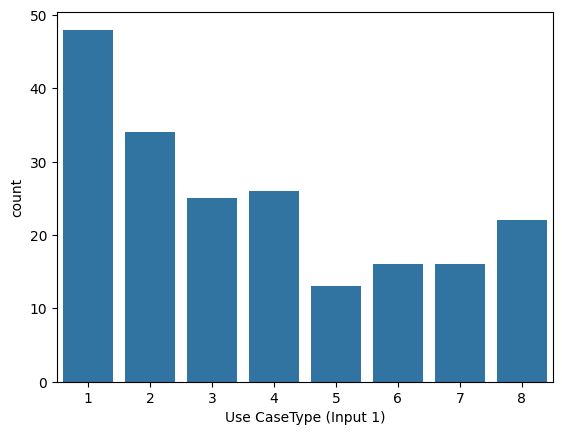

In [ ]:
sns.countplot(x = 'Use CaseType (Input 1)',data=df)

#### Exploring LTE/5G UE Category (Input 2)

In [ ]:
df['LTE/5G UE Category (Input 2)'].value_counts()

LTE/5G UE Category (Input 2)
19    16
12    16
20    15
15    15
17    13
6     12
11    11
14    10
4     10
8      9
10     9
18     9
1      9
2      8
9      7
7      7
13     7
3      6
5      5
16     3
0      3
Name: count, dtype: int64

<Axes: xlabel='LTE/5G UE Category (Input 2)', ylabel='count'>

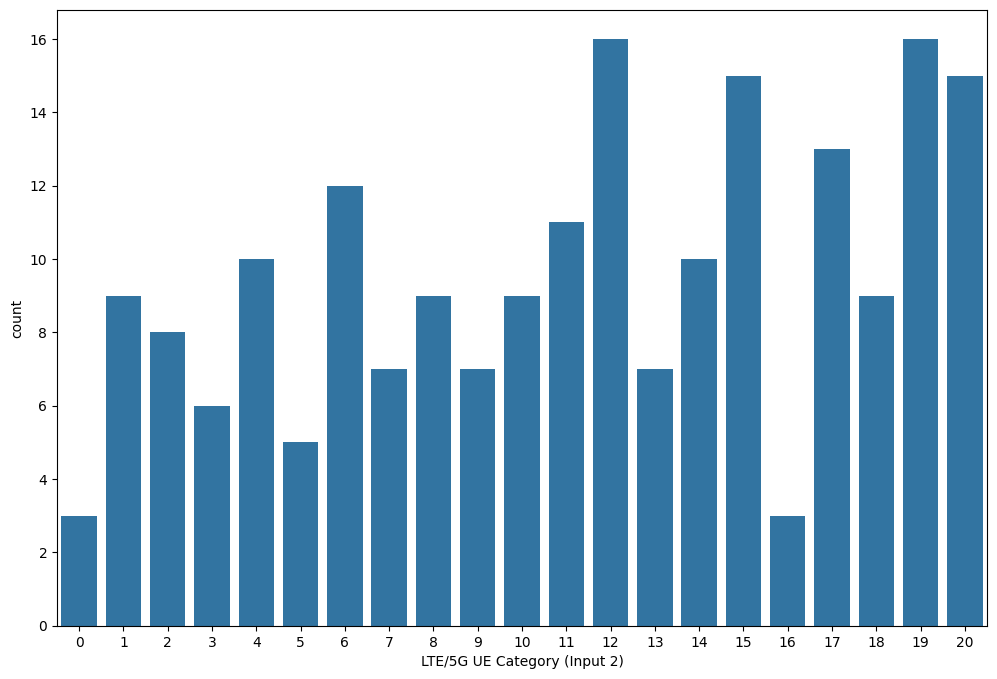

In [ ]:
plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'LTE/5G UE Category (Input 2)',data=df)

#### Exploring Technology Supported (Input 3)

In [ ]:
df['Technology Supported (Input 3)'].value_counts()

Technology Supported (Input 3)
0    127
1     73
Name: count, dtype: int64

In [ ]:
# df['Technology Supported (Input 3)'] = df['Technology Supported (Input 3)'].map({
#     "IoT (LTE-M, NB-IoT)": 0,
#     "LTE/5G": 1
#     })

<Axes: xlabel='Technology Supported (Input 3)', ylabel='count'>

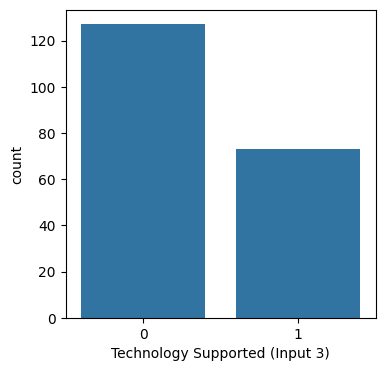

In [ ]:
plt.figure(figsize=(4, 4))  # Width and height in inches
sns.countplot(x = 'Technology Supported (Input 3)',data=df)

#### Exploring Day (Input4)

In [ ]:
df['Day (Input4)'].value_counts()

Day (Input4)
0    34
6    31
4    29
2    28
1    28
3    27
5    23
Name: count, dtype: int64

In [ ]:
# df['Day (Input4)'] = df['Day (Input4)'].map({
#     "Sunday": 0,
#     "Monday": 1,
#     "Tuesday": 2,
#     "Wednesday": 3,
#     "Thursday": 4,
#     "Friday": 5,
#     "Saturday": 6,
#     })

<Axes: xlabel='Day (Input4)', ylabel='count'>

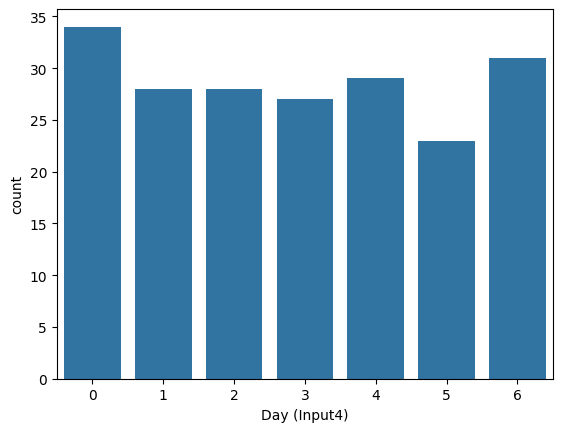

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Day (Input4)',data=df)

#### Exploring Time (Input 5)

<Axes: xlabel='Time (Input 5)', ylabel='count'>

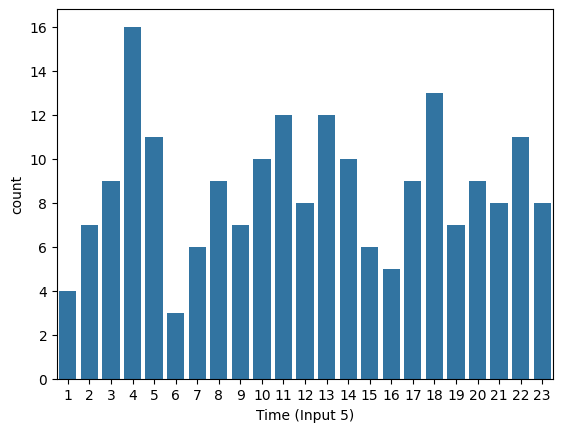

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Time (Input 5)',data=df)

#### Exploring QCI (Input 6)

<Axes: xlabel='QCI (Input 6)', ylabel='count'>

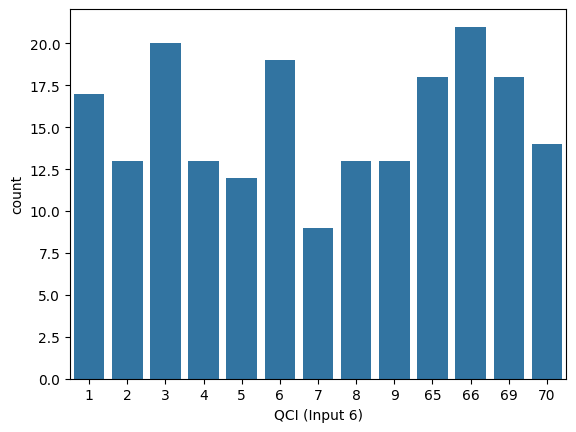

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'QCI (Input 6)',data=df)

#### Exploring Packet Loss Rate (Reliability)

<Axes: xlabel='Packet Loss Rate (Reliability)', ylabel='count'>

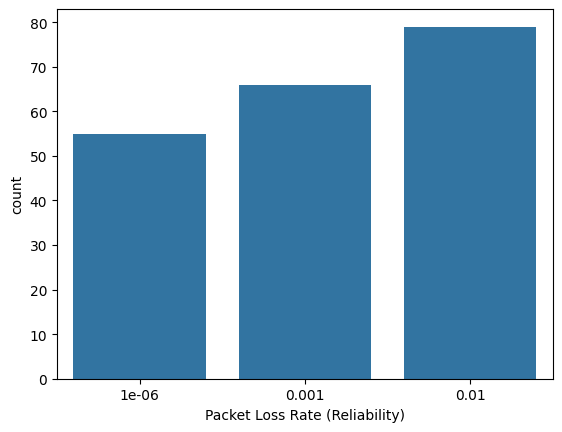

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Packet Loss Rate (Reliability)',data=df)

#### Exploring Packet Delay Budget (Latency)

In [ ]:
df['Packet Delay Budget (Latency)'].value_counts()

Packet Delay Budget (Latency)
0    85
1    67
2    48
Name: count, dtype: int64

In [ ]:
# df['Packet Delay Budget (Latency)'] = df['Packet Delay Budget (Latency)'].map({
#     "<10ms": 0,
#     "<50ms": 1,
#     "<300ms": 2
#     })

<Axes: xlabel='Packet Delay Budget (Latency)', ylabel='count'>

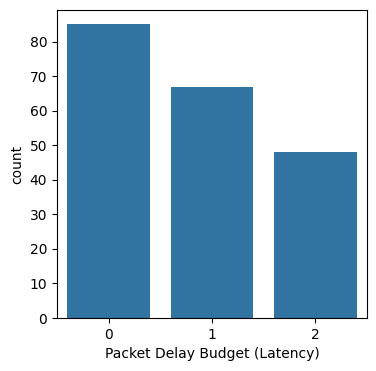

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x = 'Packet Delay Budget (Latency)',data=df)

## Coorelation Matrix and Feature Analysis

#### Coorelation Matrix

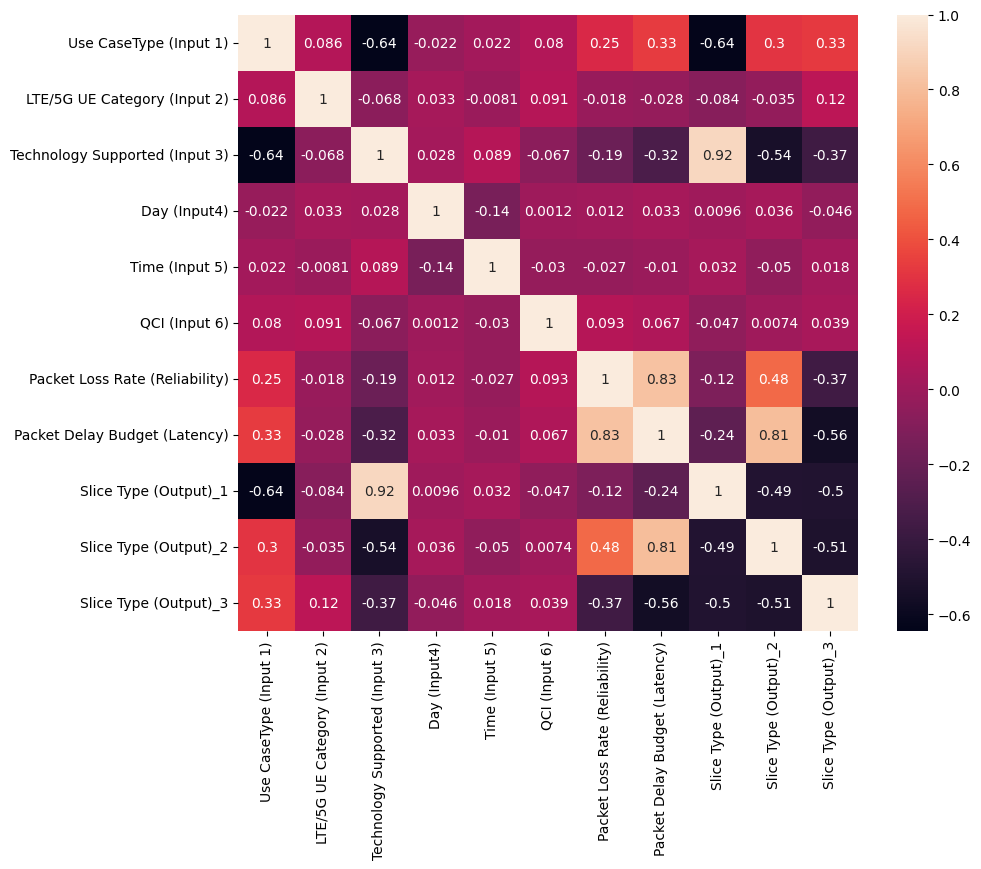

In [ ]:
corr_results = df.corr()
fig = plt.figure(figsize = (10,8))

sns.heatmap(corr_results,annot = True)
plt.show()

#### Important Features

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Load the data
# X = df

# # Select relevant columns and drop any rows with missing values
# X = X[['Use CaseType (Input 1)', 'LTE/5G UE Category (Input 2)', 'Technology Supported (Input 3)', 'Day (Input4)', 'Time (Input 5)', 'QCI (Input 6)', 'Packet Loss Rate (Reliability)', 'Packet Delay Budget (Latency)', 'Slice Type (Output)']].dropna()

# # Separate features and target variable
# y = X.pop('Slice Type (Output)')

# # Initialize and train the RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X, y)

# # Plot feature importances
# (pd.Series(model.feature_importances_, index=X.columns)
#    .nlargest(8)
#    .plot(kind='barh'))

# # Show the plot
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance Analysis')
# plt.show()


## Buliding Model

In [ ]:
df.head()

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)_1,Slice Type (Output)_2,Slice Type (Output)_3
0,4,19,0,3,21,3,0.010000,2,0,1,0
1,2,18,0,2,13,4,0.000001,0,0,0,1
2,1,19,1,5,19,2,0.001000,0,1,0,0
3,7,20,0,3,15,66,0.000001,0,0,0,1
4,1,15,1,2,17,6,0.001000,0,1,0,0


In [ ]:
X = df.iloc[:, :-3].values
y = df.iloc[:, 8:11].values

In [ ]:
X

array([[4.0e+00, 1.9e+01, 0.0e+00, ..., 3.0e+00, 1.0e-02, 2.0e+00],
       [2.0e+00, 1.8e+01, 0.0e+00, ..., 4.0e+00, 1.0e-06, 0.0e+00],
       [1.0e+00, 1.9e+01, 1.0e+00, ..., 2.0e+00, 1.0e-03, 0.0e+00],
       ...,
       [2.0e+00, 1.7e+01, 0.0e+00, ..., 1.0e+00, 1.0e-06, 0.0e+00],
       [1.0e+00, 2.0e+00, 1.0e+00, ..., 3.0e+00, 1.0e-03, 0.0e+00],
       [5.0e+00, 1.2e+01, 0.0e+00, ..., 8.0e+00, 1.0e-02, 1.0e+00]])

In [ ]:
y

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [ ]:
#%60 for train, %28 for val, %12 for test
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X, y, random_state=42, test_size= 0.4)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,random_state = 42,test_size = 0.3)

In [ ]:
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

(120, 8), (24, 8), (56, 8)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization,Dropout
from keras.models import Sequential
def build_model():

    model = Sequential()
    #Input layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "he_uniform",input_dim = 8))

    #Hidden layer 1
    model.add(Dense(8,activation = "relu",kernel_initializer = "he_uniform"))

    #Hidden layer 2
    model.add(Dense(8,activation = "relu",kernel_initializer = "he_uniform"))

    #Fully connected layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "he_uniform"))

    #Output layer
    model.add(Dense(3,activation = "softmax",kernel_initializer = "he_uniform"))
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 3)                 27        
                                                                 
Total params: 315 (1.23 KB)
Trainable params: 315 (1.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,batch_size = 20,epochs = 80,
                         validation_data=(X_val,y_val),
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/80
6/6 [==============================] - 1s 49ms/step - loss: 1.2429 - accuracy: 0.3500 - val_loss: 1.2674 - val_accuracy: 0.3214
Epoch 2/80
6/6 [==============================] - 0s 12ms/step - loss: 1.2154 - accuracy: 0.3583 - val_loss: 1.2439 - val_accuracy: 0.3393
Epoch 3/80
6/6 [==============================] - 0s 10ms/step - loss: 1.1886 - accuracy: 0.3667 - val_loss: 1.2229 - val_accuracy: 0.3393
Epoch 4/80
6/6 [==============================] - 0s 12ms/step - loss: 1.1692 - accuracy: 0.3750 - val_loss: 1.2026 - val_accuracy: 0.3393
Epoch 5/80
6/6 [==============================] - 0s 13ms/step - loss: 1.1512 - accuracy: 0.3917 - val_loss: 1.1870 - val_accuracy: 0.3750
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 1.1355 - accuracy: 0.3833 - val_loss: 1.1737 - val_accuracy: 0.3929
Epoch 7/80
6/6 [==============================] - 0s 14ms/step - loss: 1.1202 - accuracy: 0.3917 - val_loss: 1.1600 - val_accuracy: 0.3750
Epoch 8/80
6/6 [===========

In [ ]:
#Evaluation of model on test dataset.
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 40ms/step - loss: 0.3023 - accuracy: 0.8333


[0.30229613184928894, 0.8333333134651184]